https://www.crummy.com/software/BeautifulSoup/bs4/doc/

# EJEMPLO WEB SCRAPING

In [1]:
import requests # to obtain html data
import bs4      # beautifulsoup4 to parse the html content

Web Scraping es basicamente extraer datos de una o varias paginas web.
¿Por qué es importante? Por que la web es la mayor fuente de datos que existe.

Una cosa importante: Hay un tema legal con el web scraping.
Para saber si una página web permite que ocupes sus datos, debes leer su sección de "politicas de privacidad".


Aquí hay un ejemplo (antiguo) de las politicas de privacidad de la página camara.cl

Algunas páginas pueden bloquear el acceso temporalmente al recibir multiples solicitudes a velocidades "no humanas". (En este caso solo debes intentar de nuevo despues de esperar un rato).
Se supone que algunas páginas pueden bloquear tu ip si detectan "actividad sospechosa", eso significa que no podrás acceder más a la página. (Nunca me ha pasado, pero por estas cosas es importante leer las politicas de privacidad)

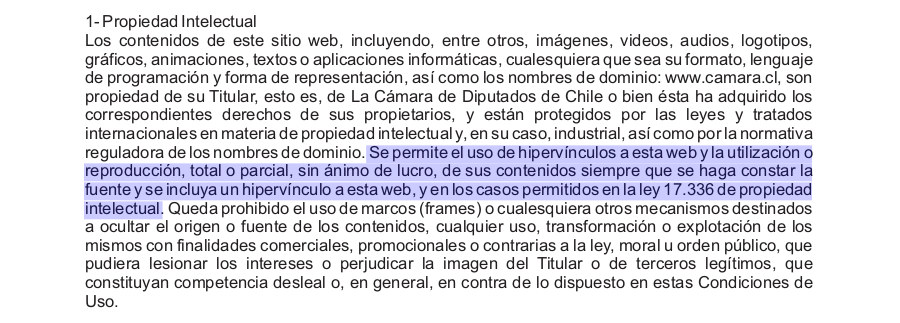

Para este ejemplo vamos a ocupar la página de la facultad de ingeniería de la Universidad de Concepción.

In [2]:
res = requests.get('https://www2.udd.cl/')

Con "requests" accedemos al contenido de la página. Como una página web es un archivo html, obtenemos el html como texto plano.

In [3]:
res.text

'<!DOCTYPE html>\n<html lang="es-ES">\n<head>\n\t<meta charset="UTF-8">\n\t<meta name="viewport" content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0">\n\t<meta name="theme-color" content="#014c8f">\n\t<!-- Google Tag Manager -->\n\t<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\tnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\tj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\t\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\t})(window,document,\'script\',\'dataLayer\',\'GTM-5VPXPW\');</script>\n\t<!-- End Google Tag Manager -->\n\t<!-- Webtracking -->\n\t<script type="text/javascript">\n\t\tvar _paq = _paq || [];\n\t\t_paq.push([\'trackPageView\']);\n\t\t_paq.push([\'enableLinkTracking\']);\n\t\t(function() {\n\t\tvar u="https://wtcl1.fidelizador.com/track.php?slug=udd";\n\t\t_paq.push([\'setTrackerUrl\', u]);\n\t\t_

Puede ver todo el contenido html (como texto sin formato) asociado con la solicitud. Para analizar y extraer información de este documento, utilizaremos BeautifulSoup.
Usando el método bs4.BeautifulSoup(text, struct_of_data) podemos inicializar un objeto que nos permita solicitar y trabajar con todas las herramientas que nos da beatigulsoup. El 'xlml' es una biblioteca fácil de usar para procesar XML y HTML en Python.

In [4]:
# !pip install lxml

In [5]:
# Analizar el HTML con BeautifulSoup
soup = bs4.BeautifulSoup(res.text, 'lxml') 

In [6]:
print(soup.prettify())


<!DOCTYPE html>
<html lang="es-ES">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0" name="viewport"/>
  <meta content="#014c8f" name="theme-color"/>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
	new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
	j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
	'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer','GTM-5VPXPW');
  </script>
  <!-- End Google Tag Manager -->
  <!-- Webtracking -->
  <script type="text/javascript">
   var _paq = _paq || [];
		_paq.push(['trackPageView']);
		_paq.push(['enableLinkTracking']);
		(function() {
		var u="https://wtcl1.fidelizador.com/track.php?slug=udd";
		_paq.push(['setTrackerUrl', u]);
		_paq.push(['setSiteId', '1']);
		var d=document,
			g

In [7]:
# Ejemplo 1: Extraer todos los títulos <h2> de la página
titles = soup.find_all('h2')
print("Títulos encontrados en la página:")
for title in titles:
    print(title.get_text(strip=True))

Títulos encontrados en la página:
Nuevo Edificio Campus Rector Ernesto Silva Bafalluy
UDD impartirá tres nuevas carreras con foco en salud, ingeniería e IA
Conoce nuestros campus
Arquitectura UDD recibe siete años de certificación
Otorgan patente a simulador de realidad virtual para cirugías diseñado por docentes UDD
Estudia con nosotros
Eventos destacados
Noticias
Nuestras Facultades
Expertos UDD explican…
Sitios relacionados


In [8]:
# Ejemplo 2: Extraer enlaces
links = soup.find_all('a', href=True)
print("\nEnlaces encontrados en la página:")
for link in links[:10]:  # Limitar a los primeros 10 enlaces para no sobrecargar
    print(link['href'])


Enlaces encontrados en la página:
https://www.udd.cl/
https://www.udd.cl/sobre-nosotros/
https://www.udd.cl/sobre-nosotros/plan-de-desarrollo-institucional/
https://www.udd.cl/sobre-nosotros/autoridades/
https://www.udd.cl/sobre-nosotros/transparencia-udd/
https://denunciayacompanamiento.udd.cl/
https://denunciayacompanamiento.udd.cl/area-inclusion/
https://www.udd.cl/sobre-nosotros/campus-e-infraestructura/
https://www.udd.cl/sobre-nosotros/impacto-udd/
https://www.udd.cl/sobre-nosotros/compromiso/


In [10]:
# Extraer todos los encabezados (h1, h2, h3)
for i in range(1, 4):
    headers = soup.find_all(f'h{i}')
    print(f"\nEncabezados H{i}:")
    for header in headers:
        print(header.get_text(strip=True))



Encabezados H1:
IMPACTO UDD

Encabezados H2:
Nuevo Edificio Campus Rector Ernesto Silva Bafalluy
UDD impartirá tres nuevas carreras con foco en salud, ingeniería e IA
Conoce nuestros campus
Arquitectura UDD recibe siete años de certificación
Otorgan patente a simulador de realidad virtual para cirugías diseñado por docentes UDD
Estudia con nosotros
Eventos destacados
Noticias
Nuestras Facultades
Expertos UDD explican…
Sitios relacionados

Encabezados H3:
Carreras de Pregrado
Postgrados
Diplomados y Educación Continua
Seminario IBEM | Avances en Regulación Emocional: Integrando neurociencia y psicoterapia
Tercera Conferencia Anual ICON-S Chile
Seminario  | Tejiendo la Escuela del Bienestar: Desafíos y Oportunidades
Investigadores UDD se adjudican financiamiento Fondecyt para 2025
UDD comienza su proceso de admisión 2025
CIES UDD y Asociación de AFP firman convenio para nuevo Barómetro Laboral Previsional
Vicedecano de Educación UDD es convocado a participar en mesa técnica para optimiz

In [11]:
# Extraer contenido de listas
lists = soup.find_all('ul')  # Cambiar a 'ol' para listas ordenadas
print("\nListas encontradas:")
for ul in lists:
    items = ul.find_all('li')
    for item in items:
        print(item.get_text(strip=True))



Listas encontradas:
Sobre NosotrosSobre NosotrosTodo lo que necesitas saber acerca de la UDD: Iniciativas estratégicas, autoridades, infraestructura, entre otros.Plan de Desarrollo InstitucionalAutoridadesTransparencia UDDPolítica Integral contra el Acoso Sexual, Violencia y Discriminación de GéneroPolítica de InclusiónCampus e infraestructuraImpacto UDDCompromiso UDDCanal de Denuncias Modelo de Prevención de DelitosOral History
Plan de Desarrollo Institucional
Autoridades
Transparencia UDD
Política Integral contra el Acoso Sexual, Violencia y Discriminación de Género
Política de Inclusión
Campus e infraestructura
Impacto UDD
Compromiso UDD
Canal de Denuncias Modelo de Prevención de Delitos
Oral History
Admisión UDDAdmisión UDDEl Proyecto Educativo UDD Futuro es una experiencia única y distintiva que ofrece a los alumnos una sólida formación disciplinar, innovadora y adecuada a las nuevas exigencias de la sociedad y el mundo laboral. Conoce nuestras carreras.Admisión Directa 2025Admis

In [13]:
# Extraer todos los enlaces
links = soup.find_all('a', href=True)
print("\nEnlaces encontrados:")
for link in links:
    print(f"Texto: {link.get_text(strip=True)} - URL: {link['href']}")



Enlaces encontrados:
Texto:  - URL: https://www.udd.cl/
Texto: Sobre Nosotros - URL: https://www.udd.cl/sobre-nosotros/
Texto: Plan de Desarrollo Institucional - URL: https://www.udd.cl/sobre-nosotros/plan-de-desarrollo-institucional/
Texto: Autoridades - URL: https://www.udd.cl/sobre-nosotros/autoridades/
Texto: Transparencia UDD - URL: https://www.udd.cl/sobre-nosotros/transparencia-udd/
Texto: Política Integral contra el Acoso Sexual, Violencia y Discriminación de Género - URL: https://denunciayacompanamiento.udd.cl/
Texto: Política de Inclusión - URL: https://denunciayacompanamiento.udd.cl/area-inclusion/
Texto: Campus e infraestructura - URL: https://www.udd.cl/sobre-nosotros/campus-e-infraestructura/
Texto: Impacto UDD - URL: https://www.udd.cl/sobre-nosotros/impacto-udd/
Texto: Compromiso UDD - URL: https://www.udd.cl/sobre-nosotros/compromiso/
Texto: Canal de Denuncias Modelo de Prevención de Delitos - URL: https://www.udd.cl/canal-de-denuncias-udd/
Texto: Oral History - URL: 

In [14]:
# Extraer URLs de imágenes
images = soup.find_all('img')
print("\nImágenes encontradas:")
for img in images:
    print(f"URL: {img.get('src')} - Texto alternativo: {img.get('alt')}")



Imágenes encontradas:
URL: https://www.udd.cl/wp-content/themes/udd-2018/assets/img/logo-udd-35-blanco.svg - Texto alternativo: Logo Universidad de Desarrollo
URL: https://www.udd.cl/wp-content/themes/udd-2018/assets/img/logo-vive-udd-negro.svg - Texto alternativo: Vive UDD
URL: https://www.udd.cl/wp-content/uploads/2019/05/Fachada-UDD-campus-ESB-1920x1080.jpg - Texto alternativo: 
URL: https://www.udd.cl/wp-content/uploads/2024/07/ai_destacado_nuevov2.jpg - Texto alternativo: 
URL: https://www.udd.cl/wp-content/uploads/2024/12/vida_universitaria_udd_dic.jpg - Texto alternativo: 
URL: https://www.udd.cl/wp-content/uploads/2024/12/arquitectura-udd.jpg - Texto alternativo: 
URL: https://www.udd.cl/wp-content/uploads/2024/11/tc-simulador-rv-inmersiva.jpg - Texto alternativo: 
URL: https://www.udd.cl/wp-content/uploads/2025/01/udd-1-1-500x500.jpg - Texto alternativo: 
URL: https://www.udd.cl/wp-content/uploads/2025/01/admision-udd-500x500.jpg - Texto alternativo: 
URL: https://www.udd.cl/

In [15]:
# Extraer información de formularios
forms = soup.find_all('form')
print("\nFormularios encontrados:")
for form in forms:
    print(f"Acción: {form.get('action')} - Método: {form.get('method')}")
    inputs = form.find_all('input')
    for inp in inputs:
        print(f"Campo: {inp.get('name')} - Tipo: {inp.get('type')}")



Formularios encontrados:
Acción: https://www.udd.cl/programas-academicos/ - Método: get
Campo: s - Tipo: text


In [ ]:
# Extraer una sección específica por clase
section = soup.find('div', class_='class-name')  # Cambia 'class-name' por la clase de interés
if section:
    print("\nSección específica encontrada:")
    print(section.get_text(strip=True))
else:
    print("No se encontró la sección especificada.")


In [16]:
# Extraer metadata
meta_tags = soup.find_all('meta')
print("\nMeta tags encontradas:")
for meta in meta_tags:
    print(meta.attrs)



Meta tags encontradas:
{'charset': 'UTF-8'}
{'name': 'viewport', 'content': 'width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0'}
{'name': 'theme-color', 'content': '#014c8f'}
{'name': 'robots', 'content': 'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1'}
{'name': 'description', 'content': 'Conoce las Carreras, Postgrados y Educación Continua de la Universidad del Desarrollo (UDD). Acreditada por 6 años en todas las áreas.'}
{'property': 'og:locale', 'content': 'es_ES'}
{'property': 'og:locale:alternate', 'content': 'en_US'}
{'property': 'og:type', 'content': 'website'}
{'property': 'og:title', 'content': 'Bienvenido a la UDD - Universidad del Desarrollo'}
{'property': 'og:description', 'content': 'Conoce las Carreras, Postgrados y Educación Continua de la Universidad del Desarrollo (UDD). Acreditada por 6 años en todas las áreas.'}
{'property': 'og:url', 'content': 'https://www.udd.cl/'}
{'property': 'og:site_na